<h2>Loading Data and Important Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = data.iloc[::,-1]
x = data.iloc[::, 0:-1]

In [4]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
def get_na(data):
    flag = False
    na_cols = dict(data.isna().sum())
    for x in na_cols.keys():
        if(na_cols[x] > 0):
            flag = True
            print(x,na_cols[x])
    if(flag == False):
        print("No Columns having NA values :)")

In [7]:
get_na(data)

No Columns having NA values :)


In [29]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## EDA

Text(0.5, 1.0, 'Age')

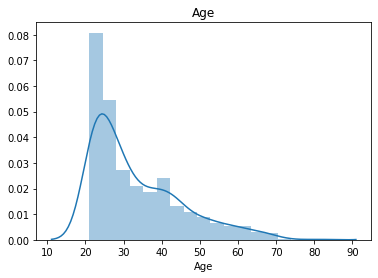

In [52]:
sns.distplot(x.Age).set_title('Age')

Text(0.5, 1.0, 'BloodPressure Level')

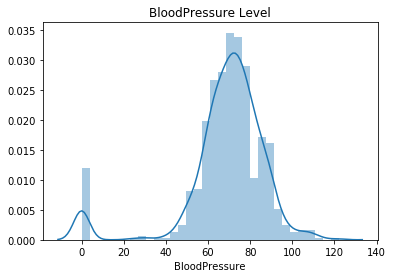

In [53]:
sns.distplot(x.BloodPressure).set_title('BloodPressure Level')

Text(0.5, 1.0, 'SkinThickness Level')

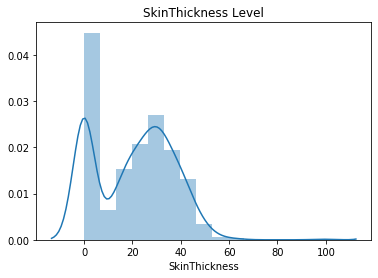

In [51]:
sns.distplot(x.SkinThickness).set_title('SkinThickness Level')

Text(0.5, 1.0, 'Insulin Level')

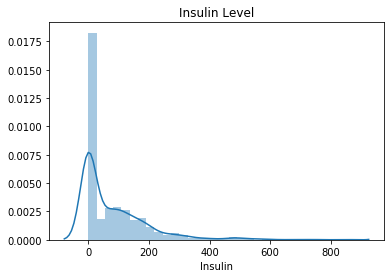

In [47]:
sns.distplot(x.Insulin).set_title('Insulin Level')

Text(0.5, 1.0, 'BMI Level')

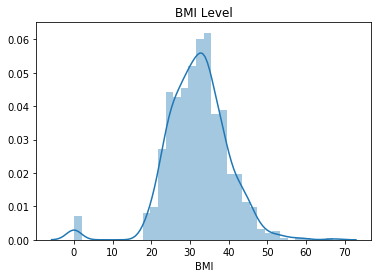

In [48]:
sns.distplot(x.BMI).set_title('BMI Level')

Text(0.5, 1.0, 'DiabetesPedigreeFunction Level')

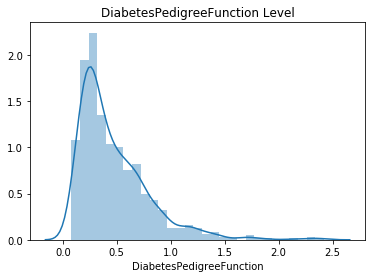

In [49]:
sns.distplot(x.DiabetesPedigreeFunction).set_title('DiabetesPedigreeFunction Level')

Text(0.5, 1.0, 'Glucose Level')

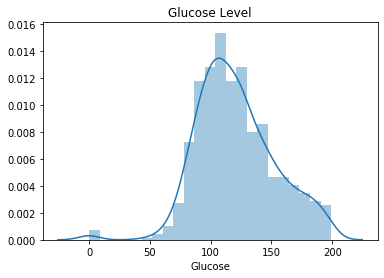

In [50]:
sns.distplot(x.Glucose).set_title('Glucose Level')

<h2>Building Model</h2>

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

<h2>Logistic Regression</h2>

In [11]:
glm = LogisticRegression(solver='liblinear')
model = glm.fit(x_train,y_train)
predicted = model.predict(x_test)

In [12]:
conf_mat = confusion_matrix(y_test, predicted)
conf_mat

array([[142,  26],
       [ 33,  53]], dtype=int64)

<h2>Random Forest</h2>

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf_obj = RandomForestClassifier(n_estimators=1000, criterion='gini', min_samples_split=2, min_samples_leaf=5, 
min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
min_impurity_split=None, bootstrap=True, n_jobs=1000, random_state=None, verbose=0)
model_rf = rf_obj.fit(x_train, y_train)
predicted_rf = model.predict(x_test)

In [15]:
conf_mat = confusion_matrix(y_test, predicted_rf)

In [16]:
conf_mat

array([[142,  26],
       [ 33,  53]], dtype=int64)

## Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler().fit(x)
scale_data = pd.DataFrame(scaler.transform(x), columns= x.columns)
scale_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [23]:
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(scale_data, y, test_size=0.33, random_state=42)

# For scaled Data Logistic Regression and Random Forest Classifier

In [27]:
# For scaled Data Logistic Regression
glm_scaled = LogisticRegression(solver='liblinear')
logistic_model_scaled = glm_scaled.fit(x_scaled_train,y_scaled_train)
logistic_predicted_scaled = logistic_model_scaled.predict(x_scaled_test)

In [28]:
conf_mat = confusion_matrix(y_scaled_test, logistic_predicted_scaled)
conf_mat

array([[136,  32],
       [ 34,  52]], dtype=int64)

In [54]:
rf_obj = RandomForestClassifier(n_estimators=1000, criterion='gini', min_samples_split=2, min_samples_leaf=5, 
min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
min_impurity_split=None, bootstrap=True, n_jobs=1000, random_state=None, verbose=0)

rf_model_rf_scaled = rf_obj.fit(x_scaled_train,y_scaled_train)
rf_predicted_rf_scaled = model.predict(x_scaled_test)

In [55]:
conf_mat = confusion_matrix(y_scaled_test, logistic_predicted_scaled)
conf_mat

array([[136,  32],
       [ 34,  52]], dtype=int64)

** Conclusion: After Standerdization Model Accuracy Decreased.